In [1]:
setwd('/import/liujing/data/')

In [2]:
data1 = read.table('./train.txt',header =T,sep = '\t',check.names =  F)

In [3]:
head(data1,2)

,Gene_name,CI10,CI11,CI12,CI13,CI14,CI15,CI16,CI17,CI18,...,H42,H43,H44,H45,H46,H4,H5,H7,H8,H9
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,PCDHGA7,0.4695917,0.0650995,0.5719537,0.2243807,0.2778357,0.3244079,0.3385146,0.3741117,0.2707183,...,0.1563046,0.1786892,0.1263336,0.07888511,0.2894804,0.4040563,0.1882475,0.1843685,0.927869,0.4618961
2,PCDHGA6,0.9626630,0.3719971,0.9496590,0.4605710,0.7203147,0.3244079,0.6073351,0.5391610,0.3970535,...,0.2709279,0.5360676,0.2411824,0.27046323,0.5010238,0.4914198,0.4823842,0.6913819,1.293789,0.7743553


In [4]:
colnames(data1) = paste0(colnames(data1),'_M1')

In [5]:
data2 = read.table('../test.txt',header =T,sep = '\t',check.names =  F)

In [6]:
colnames(data2) = paste0(colnames(data2),'_M2')

In [7]:
head(data2,2)

,Gene_name_M2,CI10_M2,CI11_M2,CI12_M2,CI13_M2,CI14_M2,CI15_M2,CI16_M2,CI1_M2,CI2_M2,...,H18_M2,H1_M2,H2_M2,H3_M2,H4_M2,H5_M2,H6_M2,H7_M2,H8_M2,H9_M2
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,RNA5SP111,0,0,0.6257938,0,0,0,0,0,0,...,0,0,0,1.409555,0,0,1.985912,0.7690921,0,0
2,RNA5SP110,0,0,0.0000000,0,0,0,0,0,0,...,0,0,0,0.000000,0,0,0.000000,0.0000000,0,0


In [8]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [9]:
data = merge(data1,data2,by.x = 'Gene_name_M1',by.y = 'Gene_name_M2') %>% na.omit()

In [10]:
data = data[!duplicated(data$Gene_name_M1),]

In [11]:
rownames(data) = data[,1]
data = data[,-1]

In [13]:
anno = data.frame(sample = colnames(data),
          group = c(rep('CI',43),rep('H',42),rep('CI',16),rep('H',18)),
          Matrix = c(rep('Matrix1',85),rep('Matrix2',34) ) )

In [22]:
rownames(anno) = anno[,1]
anno = anno[,-1]

In [23]:
head(anno,2)

,group,Matrix
,<chr>,<chr>
CI10_M1,CI,Matrix1
CI11_M1,CI,Matrix1


In [ ]:
exp = log(data+1)

cg=names(tail(sort(apply(exp,1,sd)),5000))
n=exp[cg,]

library(pheatmap)

forplot = na.omit(n)
#da=log2(data1+1)
dat=t(scale(t(forplot))) # 'scale'可以对log(fpkm+1)数值进行归一化
#处理数据
dat[dat>2]=2
dat[dat<(-2)]= -2
dim(dat)
dat = dat[complete.cases(dat), ]

In [36]:
library(pheatmap)

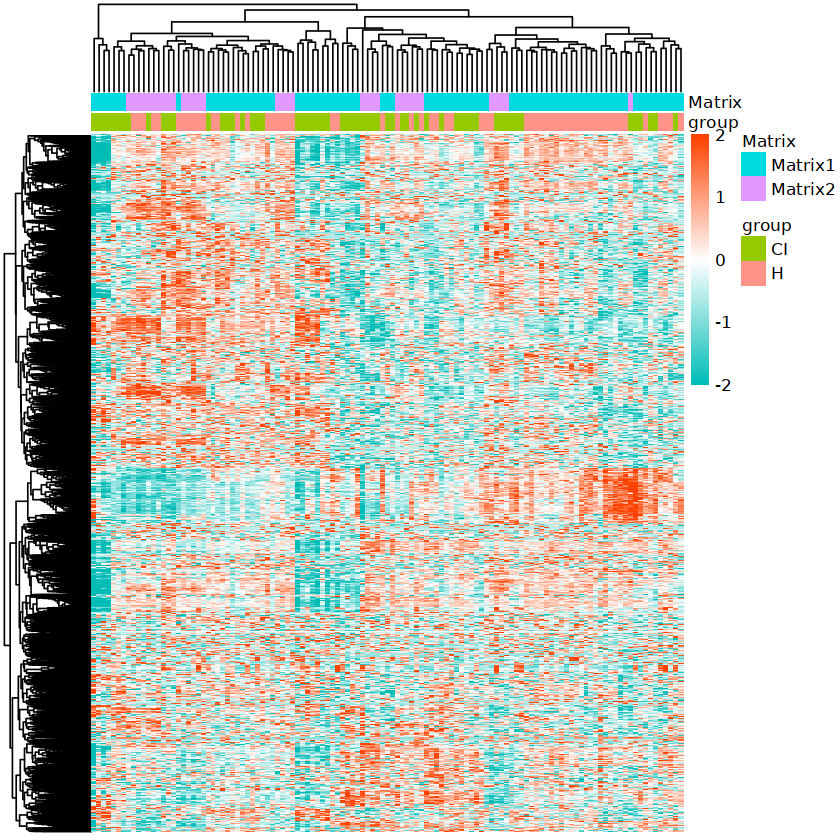

In [37]:
pheatmap(dat,
         cluster_rows = TRUE,
         cluster_cols = TRUE,
         show_rownames=FALSE,
         show_colnames = FALSE,
          scale="none",
          #cluster_cols = F,
          fontsize_row = 10,
          fontsize_col = 10,
         annotation_col = anno,
          #color = colorRampPalette(c("navy", "white", "firebrick3"))(100),
          color = colorRampPalette(c("#00BCB6", "white", "#FE4300"))(100)#换颜色
         # angle_col = 45 #修改横轴坐标名倾斜度
)

### 去批次

In [28]:
library(sva)

In [29]:
batch = anno$Matrix

In [30]:
combat_edata1 = ComBat(dat=data, batch=batch, mod=NULL, par.prior=TRUE,  prior.plots=FALSE) 

Found 1621 genes with uniform expression within a single batch (all zeros); these will not be adjusted for batch.


Found2batches

Adjusting for0covariate(s) or covariate level(s)

Standardizing Data across genes

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting the Data




In [60]:
save(combat_edata1,anno,file = 'combat_edata1.rda')

In [40]:
exp = combat_edata1

cg=names(tail(sort(apply(exp,1,sd)),5000))
n=exp[cg,]

library(pheatmap)

forplot = na.omit(n)
#da=log2(data1+1)
dat=t(scale(t(forplot))) # 'scale'可以对log(fpkm+1)数值进行归一化
#处理数据
dat[dat>2]=2
dat[dat<(-2)]= -2
dim(dat)
dat = dat[complete.cases(dat), ]

[1] 5000  119

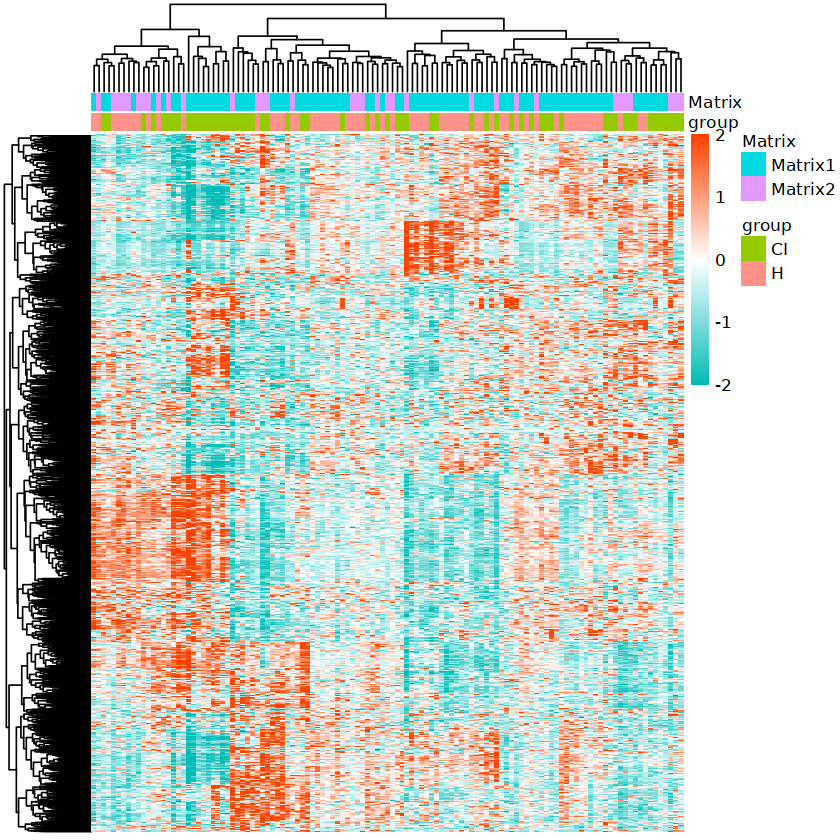

In [41]:
pheatmap(dat,
         cluster_rows = TRUE,
         cluster_cols = TRUE,
         show_rownames=FALSE,
         show_colnames = FALSE,
          scale="none",
          #cluster_cols = F,
          fontsize_row = 10,
          fontsize_col = 10,
         annotation_col = anno,
          #color = colorRampPalette(c("navy", "white", "firebrick3"))(100),
          color = colorRampPalette(c("#00BCB6", "white", "#FE4300"))(100)#换颜色
         # angle_col = 45 #修改横轴坐标名倾斜度
)

In [46]:
diff = read.table('./diffgeen.txt',header =T,sep = '\t',check.names =  F)

In [47]:
colnames(diff) = 'genename'

In [51]:
expr = combat_edata1[diff$genename,] %>% t() %>%  as.data.frame()

In [266]:
library(dplyr)

In [53]:
Type =  c(rep(1,43),rep(0,42),rep(1,16),rep(0,18))

In [54]:
head(expr,2)

,RAB7A,CEACAM1,CMTM1,RASD2,PLP2,RPL28,MANSC1,SLC26A8,OTX1,NEK2,...,HIST1H2BM,HIST1H3C,HCAR1,PDCD1LG2,F5,HSPA1A,RPS28,KIAA0040,MIF,IL10RB
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CI10_M1,66.9076,6.247454,24.29326,0.001520324,63.78944,73.71265,3.441943,1.122526,0.1237827,0.19100489,...,10.420602,12.857737,0.2893077,6.472217,7.924083,4.383833,90.7879,42.88942,1.0748501,32.77379
CI11_M1,136.9528,14.772961,43.92996,0.001520324,92.29331,62.27513,15.663452,4.444080,0.5389856,0.07074045,...,3.172594,7.920488,1.1813825,1.004807,12.073782,28.687144,119.7182,71.81483,0.6814969,58.25386


In [56]:
save(expr,Type,file = 'expr.rda')

In [66]:
data1 = data %>% tibble::rownames_to_column(.,'GENE')